In [35]:
!ls

README.md                london_cambridge_avg.csv uk_house_prices.ipynb


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
lon_v_cam_avg = pd.read_csv('london_cambridge_avg.csv')

In [38]:
lon_v_cam_avg.head()

,Name,URI,Region GSS code,Period,Sales volume,Reporting period,Average price All property types,Pivotable date
0,Cambridge,http://landregistry.data.gov.uk/id/region/camb...,E07000008,2007-01,190.0,monthly,261935,2007-01-01
1,London,http://landregistry.data.gov.uk/id/region/london,E12000007,2007-01,12794.0,monthly,267658,2007-01-01
2,Cambridge,http://landregistry.data.gov.uk/id/region/camb...,E07000008,2007-02,138.0,monthly,262304,2007-02-01
3,London,http://landregistry.data.gov.uk/id/region/london,E12000007,2007-02,12194.0,monthly,270780,2007-02-01
4,Cambridge,http://landregistry.data.gov.uk/id/region/camb...,E07000008,2007-03,149.0,monthly,260488,2007-03-01


In [39]:
london = lon_v_cam_avg[['Average price All property types', 'Period']].where(lon_v_cam_avg['Region GSS code'] == 'E12000007')

In [40]:
cambridge = lon_v_cam_avg[['Average price All property types', 'Period']].where(lon_v_cam_avg['Region GSS code'] == 'E07000008')
cambridge.dropna(inplace = True)
cambridge.rename(columns={'Average price All property types': 'Avg_price'}, inplace= True) 

In [41]:
london.dropna(inplace=True)
london.head()

,Average price All property types,Period
1,267658.0,2007-01
3,270780.0,2007-02
5,273479.0,2007-03
7,278805.0,2007-04
9,282726.0,2007-05


In [42]:
london.rename(columns={'Average price All property types': 'Avg_price'}, inplace= True) 

In [43]:
london.head()

,Avg_price,Period
1,267658.0,2007-01
3,270780.0,2007-02
5,273479.0,2007-03
7,278805.0,2007-04
9,282726.0,2007-05


In [44]:
london.columns

Index(['Avg_price', 'Period'], dtype='object')

In [45]:
london['Period'] = pd.to_datetime(london['Period'], format = "%Y/%m")
cambridge['Period'] = pd.to_datetime(cambridge['Period'], format = "%Y/%m")

In [46]:
london.set_index('Period', inplace= True)
cambridge.set_index('Period', inplace= True)

In [47]:
london.dtypes

Avg_price    float64
dtype: object

In [48]:
cambridge.head()
london.head()

,Avg_price
Period,
2007-01-01,267658.0
2007-02-01,270780.0
2007-03-01,273479.0
2007-04-01,278805.0
2007-05-01,282726.0


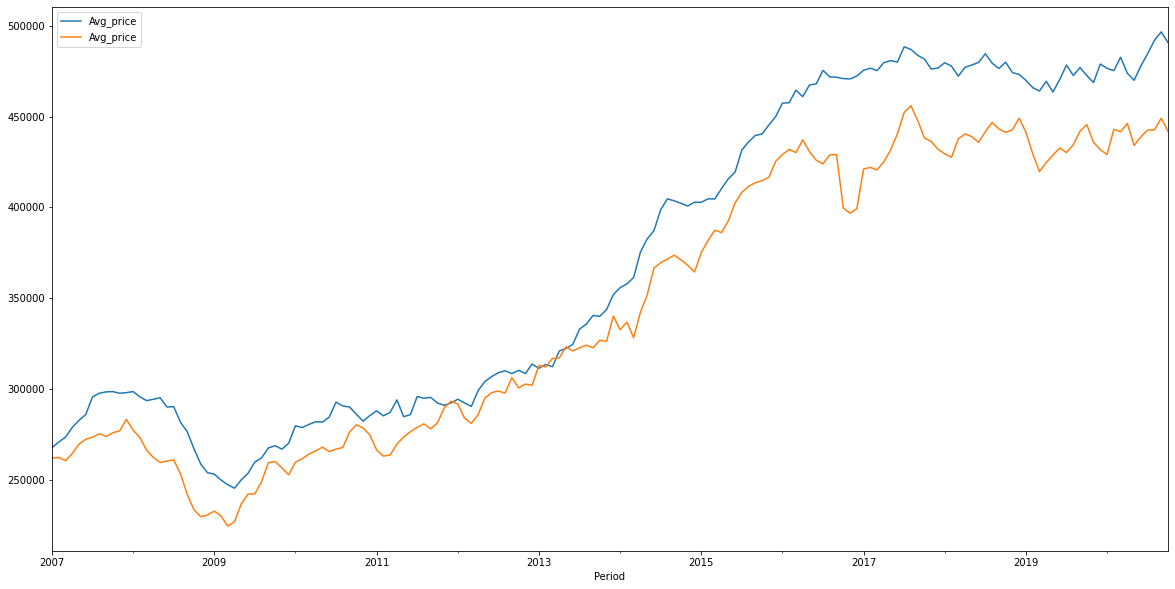

In [50]:
ax = london.plot(legend = True)
cambridge.plot(ax = ax, figsize = (20, 10), legend = True)